# Cегментация изображений

In [7]:
import sys
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import segmentation_utils as su
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import KMeans
from skimage.feature import peak_local_max
from skimage.segmentation import watershed
from skimage import data
from scipy import ndimage
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

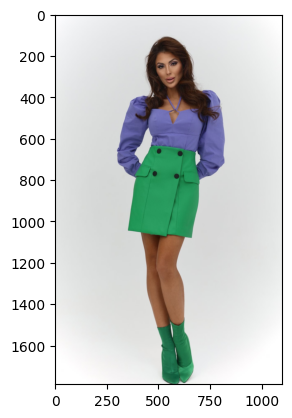

In [3]:
image = cv.imread('images/women.jpeg')
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.show()

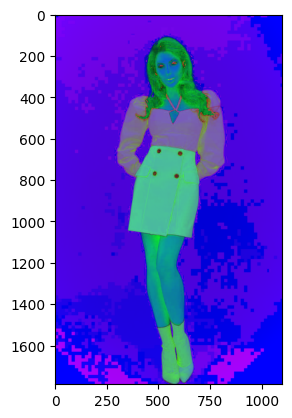

In [4]:
image_hsv = cv.cvtColor(image_rgb, cv.COLOR_RGB2HSV)
plt.imshow(image_hsv)
plt.show()

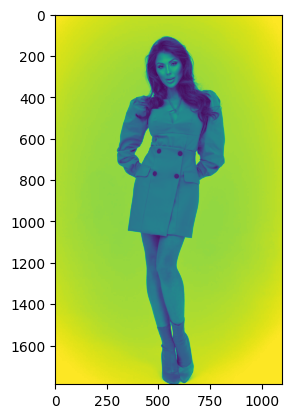

In [5]:
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
plt.imshow(gray)
plt.show()

<Figure size 1500x2000 with 0 Axes>

<Axes: >

<Axes: >

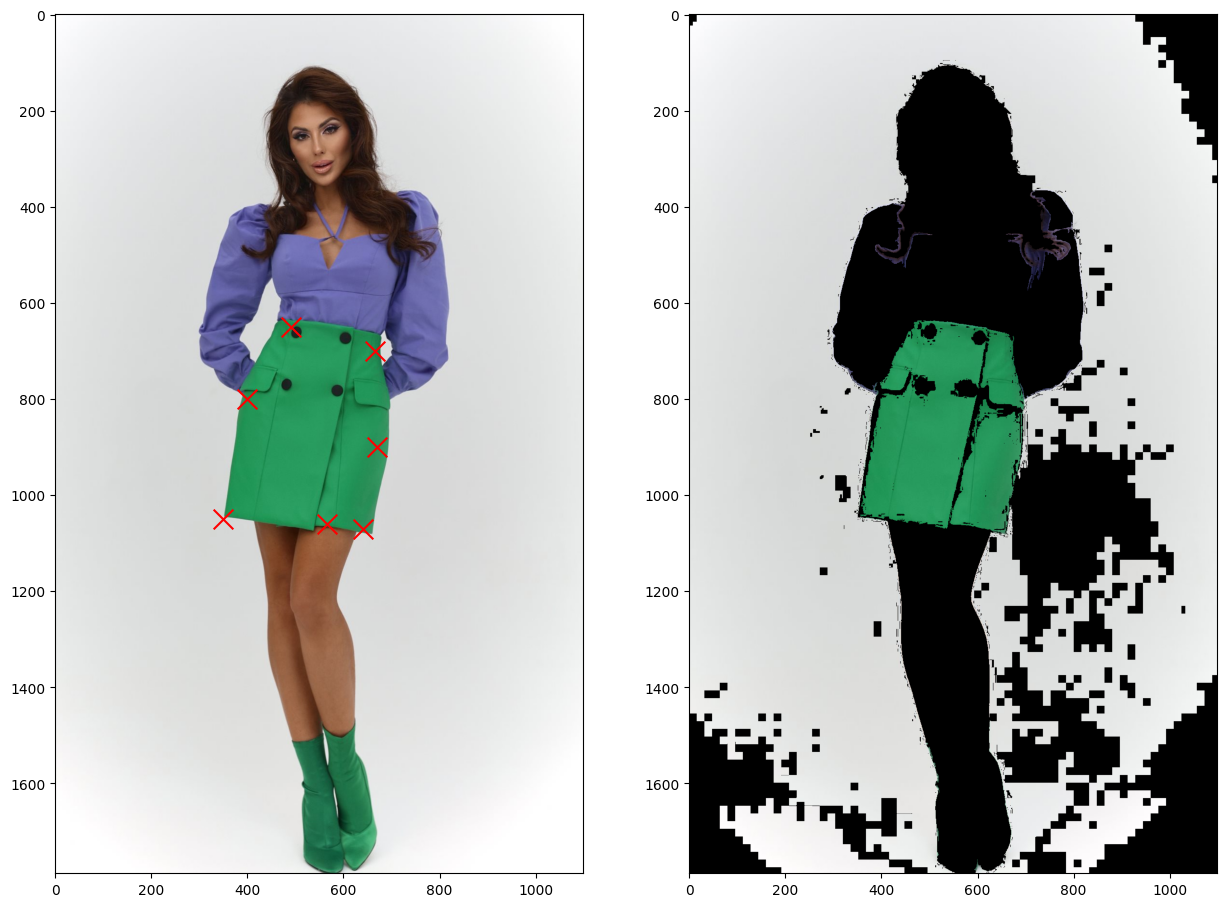

In [11]:
# определяем координаты начальных точек
seeds = [(650, 490), (800, 400), (1050, 350), (1060, 565),(1070, 640),(900, 670),(700, 665)]
# координаты для графика
x = list(map(lambda x: x[1], seeds))
y = list(map(lambda x: x[0], seeds))
# порог похожести цвета региона
threshold = 100
# находим сегментацию используя метод из segmentation_utils
segmented_region = su.region_growingHSV(image_hsv, seeds, threshold)
# накладываем маску - отображаем только участки попавшие в какой-либо сегмент
result = cv.bitwise_and(image, image, mask=segmented_region)
# отображаем полученное изображение
plt.figure(figsize=(15,20))
plt.subplot(1, 2, 1)
plt.scatter(x, y, marker="x", color="red", s=200)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.show()